### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Life expectancy dataset and display the first five records 

In [48]:
df = pd.read_csv('Life_Expectancy.csv')
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [49]:
df.shape

(182, 20)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

In [51]:
df.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
df['Life_Expectancy'].isnull().sum()

9

When there are missing values in the target variable, we won't do any imputation. We just drop the rows

In [53]:
df.dropna(subset='Life_Expectancy',inplace=True)

In [54]:
df['Life_Expectancy'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
df=df.drop('Alcohol',axis=1)

In [56]:
df.shape

(173, 19)

In [57]:
df.fillna(df.median(),inplace=True)

C:\Users\Sai\AppData\Local\Temp\ipykernel_4396\1048787520.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


In [58]:
df.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
df['Status']=pd.get_dummies(df['Status'],drop_first=True)

In [60]:
df=df.drop('Country',axis=1)

In [61]:
df.head()

,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,2015,1,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2015,1,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,2015,1,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,2015,1,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,2015,1,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
import statsmodels.api as sm
y=df['Life_Expectancy']
x=df.drop('Life_Expectancy',axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     71.94
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.88e-64
Time:                        19:44:16   Log-Likelihood:                -416.42
No. Observations:                 173   AIC:                             868.8
Df Residuals:                     155   BIC:                             925.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1792.7220   2921.032      0.614      0.540   -3977.447    7562.891
Year                 -0.8627      1.450     -0.595      0.553      -3.726       2.001
Status               -1.0795      0.693     -1.558      0.121      -2.448       0.289
Adult_Mortality      -0.0236      0.003     -6.753      0.000      -0.031      -0.017
Infant_Deaths         0.1014      0.033      3.094      0.002       0.037       0.166
Hepatitis B           0.0445      0.023      1.920      0.057      -0.001       0.090
Measles           -9.157e-05   5.55e-05     -1.649      0.101      -0.000    1.81e-05
BMI                  -0.0150      0.014     -1.070      0.286      -0.043       0.013
Underfive_Deaths     -0.0726      0.024     -3.060      0.003      -0.120      -0.026
Polio                 0.0147      0.013      1.146      0.253      -0.011       0.040
Diphtheria           -0.0067      0.027     -0.250      0.803      -0.060       0.046
HIV                  -0.4825      0.223     -2.161      0.032      -0.924      -0.041
GDP               -4.413e-06   2.31e-05     -0.191      0.849   -5.01e-05    4.12e-05
Population         1.349e-09   9.86e-09      0.137      0.891   -1.81e-08    2.08e-08
Malnourished10_19    -0.1347      0.239     -0.564      0.574      -0.607       0.337
Malnourished5_9      -0.0774      0.237     -0.327      0.744      -0.545       0.390
Income_Index         28.5497      4.519      6.318      0.000      19.623      37.477
Schooling            -0.0127      0.197     -0.064      0.949      -0.402       0.377
==============================================================================
Omnibus:                        9.098   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.887
Skew:                          -0.274   Prob(JB):                     0.000965
Kurtosis:                       4.275   Cond. No.                     3.81e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

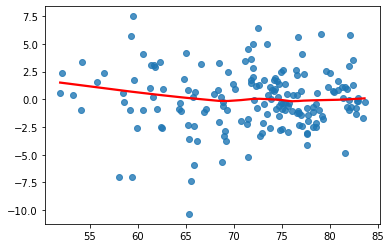

In [63]:
residuals = model.resid
y_pred = model.predict(Xc)

sns.regplot(y_pred,residuals,lowess=True,line_kws={'color':'red'})

In [64]:
### Goldfeld-Quandt Test

import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=residuals,x=Xc)

(1.3310419903283532, 0.11872293504785078, 'increasing')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
y=  df['Life_Expectancy']
x = df[['Polio','Diphtheria ','Hepatitis B']]
Xc = sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     71.94
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.88e-64
Time:                        19:44:16   Log-Likelihood:                -416.42
No. Observations:                 173   AIC:                             868.8
Df Residuals:                     155   BIC:                             925.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1792.7220   2921.032      0.614      0.540   -3977.447    7562.891
Year                 -0.8627      1.450     -0.595      0.553      -3.726       2.001
Status               -1.0795      0.693     -1.558      0.121      -2.448       0.289
Adult_Mortality      -0.0236      0.003     -6.753      0.000      -0.031      -0.017
Infant_Deaths         0.1014      0.033      3.094      0.002       0.037       0.166
Hepatitis B           0.0445      0.023      1.920      0.057      -0.001       0.090
Measles           -9.157e-05   5.55e-05     -1.649      0.101      -0.000    1.81e-05
BMI                  -0.0150      0.014     -1.070      0.286      -0.043       0.013
Underfive_Deaths     -0.0726      0.024     -3.060      0.003      -0.120      -0.026
Polio                 0.0147      0.013      1.146      0.253      -0.011       0.040
Diphtheria           -0.0067      0.027     -0.250      0.803      -0.060       0.046
HIV                  -0.4825      0.223     -2.161      0.032      -0.924      -0.041
GDP               -4.413e-06   2.31e-05     -0.191      0.849   -5.01e-05    4.12e-05
Population         1.349e-09   9.86e-09      0.137      0.891   -1.81e-08    2.08e-08
Malnourished10_19    -0.1347      0.239     -0.564      0.574      -0.607       0.337
Malnourished5_9      -0.0774      0.237     -0.327      0.744      -0.545       0.390
Income_Index         28.5497      4.519      6.318      0.000      19.623      37.477
Schooling            -0.0127      0.197     -0.064      0.949      -0.402       0.377
==============================================================================
Omnibus:                        9.098   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.887
Skew:                          -0.274   Prob(JB):                     0.000965
Kurtosis:                       4.275   Cond. No.                     3.81e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
y=df['Life_Expectancy']
x = df[['Malnourished10_19','Malnourished5_9']]
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     24.32
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           5.13e-10
Time:                        19:44:16   Log-Likelihood:                -583.65
No. Observations:                 173   AIC:                             1173.
Df Residuals:                     170   BIC:                             1183.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.1322      0.803     94.851      0.000      74.548      77.717
Malnourished10_19    -0.4125      0.564     -0.731      0.466      -1.526       0.701
Malnourished5_9      -0.5004      0.553     -0.906      0.366      -1.591       0.590
==============================================================================
Omnibus:                        6.548   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.783
Skew:                          -0.476   Prob(JB):                       0.0337
Kurtosis:                       2.810   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

SS = StandardScaler()
y = df['Life_Expectancy']
x = df.drop('Life_Expectancy',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_trains = SS.fit_transform(x_train)
x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = SS.transform(x_test)
x_tests = pd.DataFrame(x_tests,columns=x.columns)

In [68]:
lir = LinearRegression()
lir.fit(x_trains,y_train)

y_pred_train = lir.predict(x_trains)
y_pred_test = lir.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test)))

r2-train:  0.8821886241262731
rmse-train:  2.696514001963176


r2-test:  0.7798235439443467
rmse-test:  3.918784736141247


In [69]:
sgd = SGDRegressor(random_state=44)

sgd.fit(x_trains,y_train)

y_pred_train = sgd.predict(x_trains)
y_pred_test = sgd.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test)))

r2-train:  0.8696438891731606
rmse-train:  2.836447588722323


r2-test:  0.8819607804302141
rmse-test:  2.869320980917073


The fit for Gradient Descent approach is much higher than least Square

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
x_trains2 = x_train[['Diphtheria ','Polio','Hepatitis B']]
x_tests2 = x_test[['Diphtheria ','Polio','Hepatitis B']]

lir.fit(x_trains2,y_train)
sgd.fit(x_trains2,y_train)

cf = pd.DataFrame([lir.coef_,sgd.coef_]).T
cf.columns=['Lir_coefs','sgd_coefs']
cf

,Lir_coefs,sgd_coefs
0,0.118074,-1.750307e+09
1,0.108172,-9.819670e+10
2,-0.026737,-8.425876e+10


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
lir = LinearRegression()
lir.fit(x_trains,y_train)

y_pred_train = lir.predict(x_trains)
y_pred_test = lir.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test)))

r2-train:  0.8821886241262731
rmse-train:  2.696514001963176


r2-test:  0.7798235439443467
rmse-test:  3.918784736141247


r2 on train is 0.88 and on test is 0.77 which indicate presence moderate level of overfitting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
pd.DataFrame(lir.coef_,index=x.columns,columns=['coefs'])

,coefs
Year,-0.148218
Status,-0.674242
Adult_Mortality,-2.290799
Infant_Deaths,21.261203
Hepatitis B,1.562338
Measles,-0.784560
BMI,-0.205517
Underfive_Deaths,-20.167775
Polio,0.289771
Diphtheria,-0.401644


Impact of each of the features are indicated by the coefficients (direction impact and importance)

<AxesSubplot:>

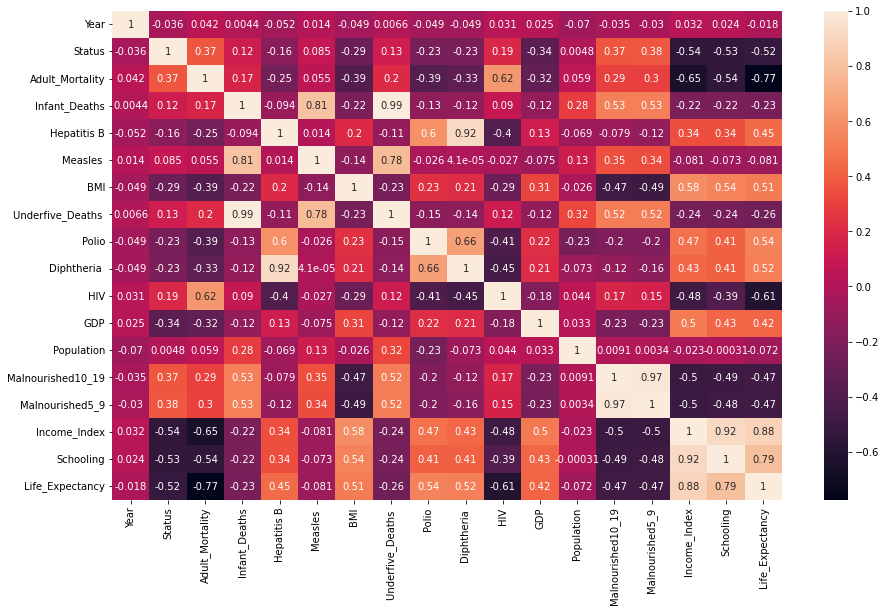

In [73]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV

In [75]:
x_trains2 = x_train[['Diphtheria ','Polio','Hepatitis B','Measles ','HIV']]
x_tests2 = x_test[['Diphtheria ','Polio','Hepatitis B','Measles ','HIV']]

ridge = Ridge(alpha=1.5)
ridge.fit(x_trains,y_train)

y_pred_train = ridge.predict(x_trains)
y_pred_test = ridge.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test)))

r2-train:  0.8726829682158512
rmse-train:  2.8031886001015796


r2-test:  0.8869212219509104
rmse-test:  2.8083842104056433


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
ridge = Ridge(alpha=1)
ridge.fit(x_trains,y_train)

y_pred_train = ridge.predict(x_trains)
y_pred_test = ridge.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test)))

r2-train:  0.8734164910461008
rmse-train:  2.795101806783809


r2-test:  0.8887188380256115
rmse-test:  2.7859723070093803


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.001)
enet.fit(x_trains,y_train)

y_pred_train = enet.predict(x_trains)
y_pred_test = enet.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test)))

r2-train:  0.8652542626184724
rmse-train:  2.8838096014616075


r2-test:  0.8838379734542763
rmse-test:  2.846413950629603


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
enet = ElasticNet(alpha=0.5,l1_ratio=0.001)
enet.fit(x_trains,y_train)

y_pred_train = enet.predict(x_trains)
y_pred_test = enet.predict(x_tests)

print('r2-train: ', r2_score(y_train,y_pred_train))
print('rmse-train: ', np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('\n')
print('r2-test: ', r2_score(y_test,y_pred_test))
print('rmse-test: ', np.sqrt(mean_squared_error(y_test,y_pred_test))

r2-train:  0.8431841319186473
rmse-train:  3.111029068343378


r2-test:  0.8656370389266299
rmse-test:  3.061299019174712


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
from sklearn.model_selection import GridSearchCV
params = [{'alpha':[7,8,9,10,11]}]

ridge = Ridge()

gs = GridSearchCV(ridge,param_grid=params,scoring='r2',cv=3)
gs.fit(x_trains,y_train)
gs.best_params_

{'alpha': 11}

Alpha=11 is the best among the provider options

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
params = [{'alpha':[7,8,9,10,11]}]

lasso = Lasso()

gs = GridSearchCV(lasso,param_grid=params,scoring='r2',cv=3)
gs.fit(x_trains,y_train)
gs.best_params_

{'alpha': 7}

Among the provided options Alpha=7 is the best

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
x_trains2 = x_trains.iloc[:,[15,16,7,12]]
x_tests2 = x_tests.iloc[:,[15,16,7,12]]


params = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

enet = ElasticNet()

gs = GridSearchCV(enet,param_grid=params,scoring='r2',cv=3)
gs.fit(x_trains,y_train)
gs.best_params_

{'alpha': 0.5, 'l1_ratio': 0.85}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
params = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

enet = ElasticNet(alpha=0.8)

gs = GridSearchCV(enet,param_grid=params,scoring='r2',cv=3)
gs.fit(x_trains,y_train)
gs.best_params_

{'l1_ratio': 1}